<a href="https://colab.research.google.com/github/VihangaMalith/Customer-Churn-Project/blob/main/CW_DataPreprocessing_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading Dataset

In [ ]:
from google.colab import files
upload = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


###Data Understanding

In [ ]:
print("Shape of dataset:", df.shape)
df.info()
df.describe()
df['Churn'].value_counts()

Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

,count
Churn,
No,5174
Yes,1869


###Data Cleaning

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df = df.dropna()
df = df.drop_duplicates()
df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)
df["tenure"] = df["tenure"].astype(int)
print("New shape after cleaning:", df.shape)
df.isnull().sum()


New shape after cleaning: (7032, 21)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##Full EDA (Exploratary Data Analysis)

###Churn Distribution (Counts + Percentages)

/tmp/ipython-input-3640377702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'], palette="Set2")


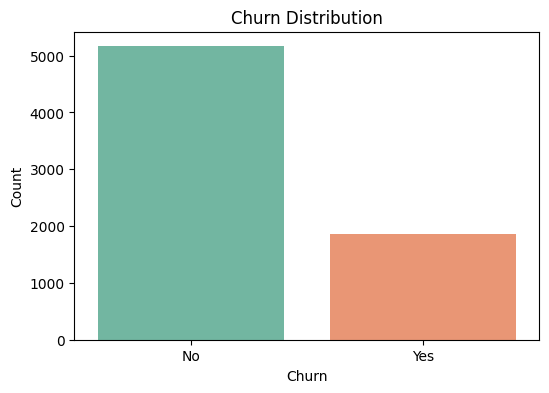

,proportion
Churn,
No,73.421502
Yes,26.578498


In [ ]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Churn'], palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Percentages
(df['Churn'].value_counts(normalize=True) * 100)


###Numerical Feature Distributions

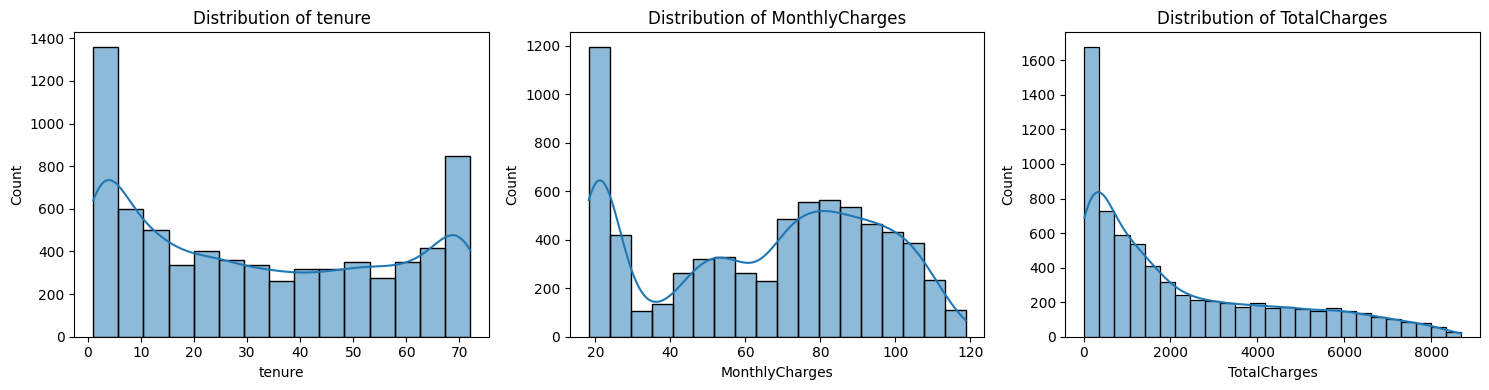

In [ ]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

###Churn vs Numerical Features

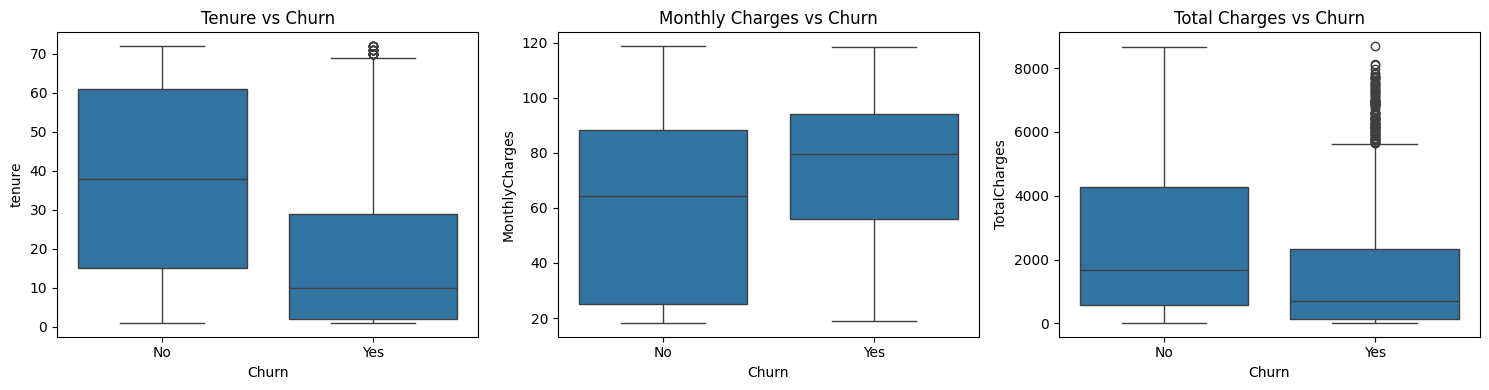

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")

plt.subplot(1,3,2)
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")

plt.subplot(1,3,3)
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")

plt.tight_layout()
plt.show()

###Categorical Features vs Churn

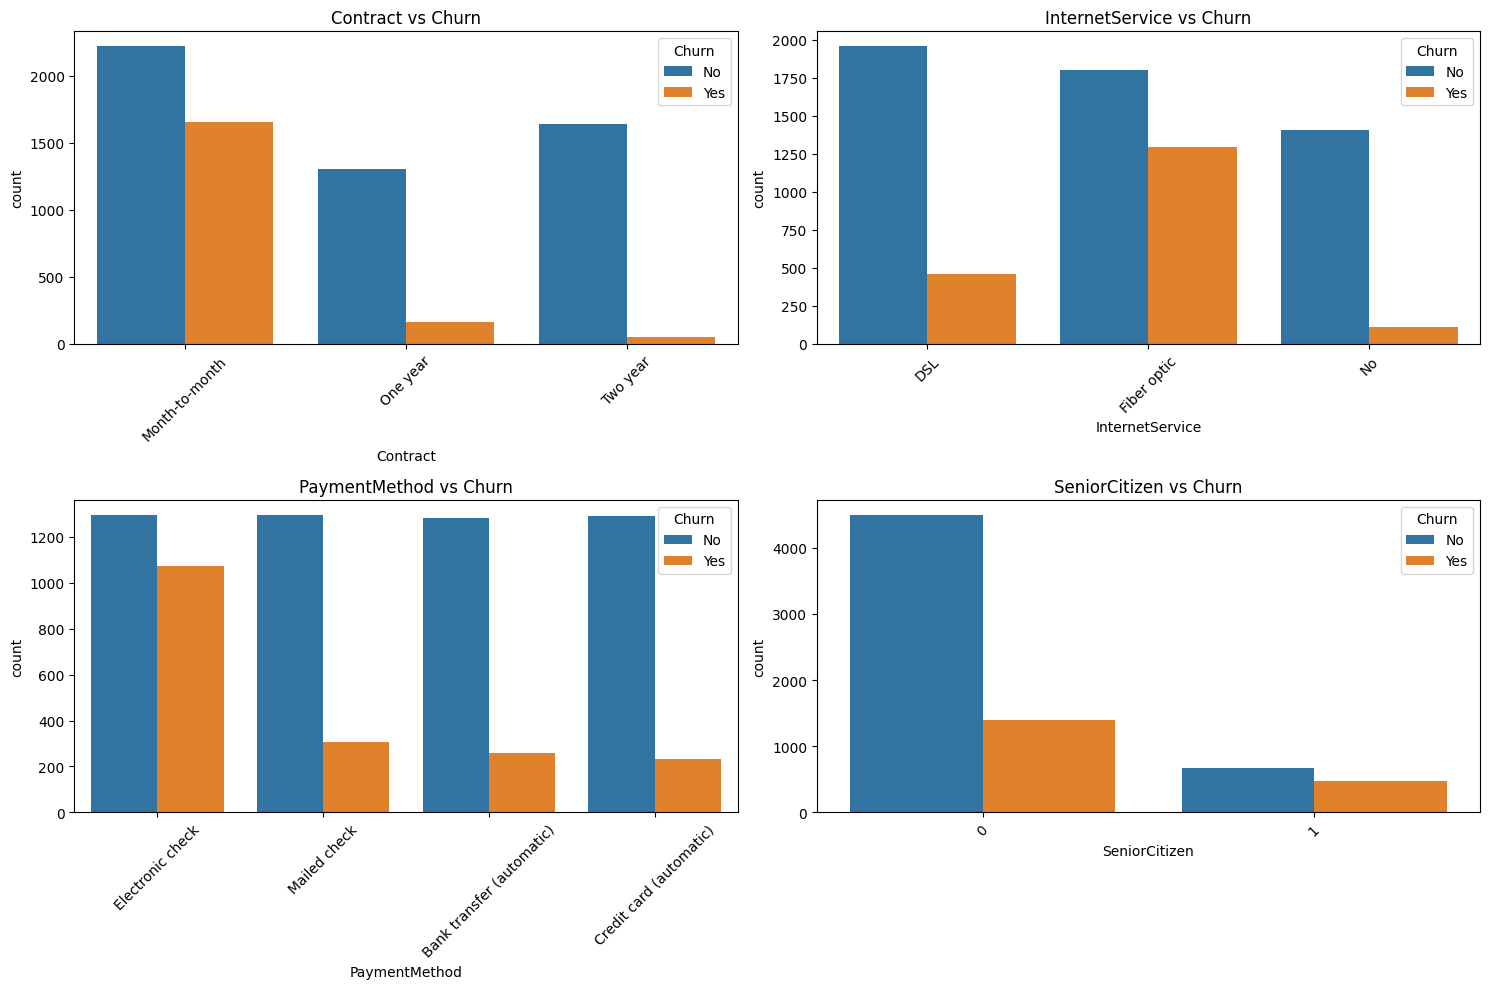

In [ ]:
cat_cols = ["Contract", "InternetService", "PaymentMethod", "SeniorCitizen"]

plt.figure(figsize=(15,10))

for i, col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(x=col, hue="Churn", data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()

###Correlation Heatmap

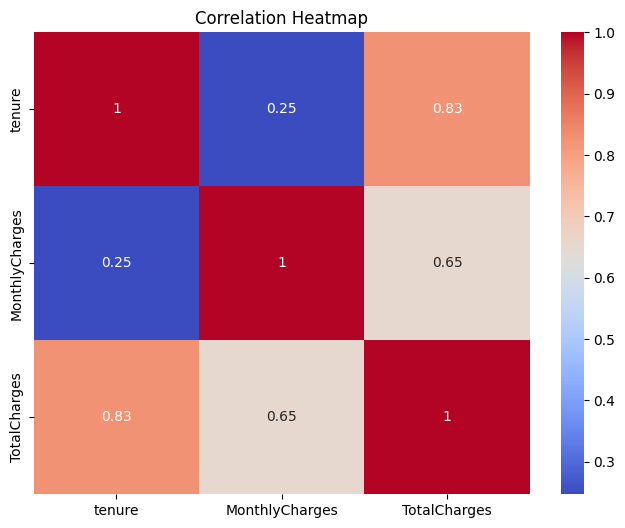

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

###Summary of Insights from EDA

In [ ]:
print("KEY EDA INSIGHTS:\n")
print("1. Churn is imbalanced: majority = No, minority = Yes.")
print("2. Churners have lower tenure (new customers leave quickly).")
print("3. MonthlyCharges is higher for churners.")
print("4. Contract type strongly affects churn – month-to-month churns the most.")
print("5. InternetService = Fiber optic users churn more.")
print("6. PaymentMethod = Electronic check customers churn more.")
print("7. Tenure and TotalCharges are highly correlated.")

KEY EDA INSIGHTS:

1. Churn is imbalanced: majority = No, minority = Yes.
2. Churners have lower tenure (new customers leave quickly).
3. MonthlyCharges is higher for churners.
4. Contract type strongly affects churn – month-to-month churns the most.
5. InternetService = Fiber optic users churn more.
6. PaymentMethod = Electronic check customers churn more.
7. Tenure and TotalCharges are highly correlated.


##Data Preprocessing

###Feature Engineering

In [ ]:
# Create Tenure Group (categorizing customer loyalty level)
# New = 0–12 months, Mid = 13–36 months, Loyal = 37+ months
df["TenureGroup"] = pd.cut(
    df["tenure"],
    bins=[0,12,36,72],
    labels=["New","Mid","Loyal"],
    include_lowest=True
    )

# Create TotalServices feature
# Count how many services each customer uses
service_cols = [
    "PhoneService","MultipleLines","InternetService","OnlineSecurity",
    "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"
]
df["TotalServices"] = df[service_cols].apply(lambda row: row.eq("Yes").sum(), axis=1)

# Create MonthlyChargeRange feature
# Segment customers based on how much they pay monthly
df["MonthlyChargeRange"] = pd.cut(
    df["MonthlyCharges"],
    bins=[0,45,75,150],
    labels=["Low","Medium","High"]
    )

# Convert Yes/No columns into numeric (1 = Yes, 0 = No)
# This reduces one-hot encoding size and speeds up training
yn_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in yn_cols:
    df[col] = df[col].map({"Yes":1,"No":0})

# Create Average Charge Per Month feature
# Helps measure spending behavior over time
df["AvgChargePerMonth"] = df["TotalCharges"] / (df["tenure"] + 1)

# Drop customerID as it has no predictive value
df = df.drop("customerID", axis=1)


###One-Hot Encode Categorical Features

In [ ]:
# Identify categorical columns to encode
categorical_cols = df.select_dtypes(include=["object"]).columns
# Apply one-hot encoding and drop first level to avoid dummy variable trap
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

###Scale Numerical Features

In [ ]:
num_cols = df_encoded.select_dtypes(include=["int64","float64"]).columns
# After one-hot encoding, 'Churn' column is renamed to 'Churn_Yes'
# and is typically of integer type (0 or 1), so it would be included in num_cols.
# We need to exclude it from scaling as it's the target variable.
num_cols = num_cols.drop("Churn_Yes", errors='ignore') # Use errors='ignore' to prevent error if 'Churn_Yes' is somehow not found

# Apply Standard Scaling (important for ANN model)
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

###Train-Test Split

In [ ]:
# Split encoded and scaled dataset into training and testing sets
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

###Combine resampled training + original testing into ONE Preprocessed dataset

In [ ]:
train_final = pd.concat([X_train, y_train], axis=1)
test_final = pd.concat([X_test, y_test], axis=1)

preprocessed_df = pd.concat([train_final, test_final], axis=0)

preprocessed_df.to_csv("preprocessed_data.csv", index=False)
preprocessed_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,TenureGroup,TotalServices,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
6030,-0.440327,-0.965608,-0.652305,0.430998,-3.056334,0.828939,-0.523477,-0.091370,Loyal,-0.176214,...,False,True,False,True,False,False,False,False,False,True
3410,-0.440327,-0.965608,-0.652305,-1.198760,0.327189,-1.206361,-0.378881,-0.924111,New,-0.661199,...,False,True,False,False,False,False,True,False,False,True
5483,-0.440327,1.035617,-0.652305,0.919926,0.327189,0.828939,0.430523,0.959516,Loyal,-0.176214,...,False,False,False,False,False,False,False,True,False,True
5524,-0.440327,1.035617,1.533025,0.512486,0.327189,-1.206361,-0.337331,0.119297,Loyal,-0.176214,...,False,False,False,False,False,True,False,False,False,False
6337,-0.440327,1.035617,1.533025,0.919926,0.327189,-1.206361,1.200040,1.396490,Loyal,0.793756,...,False,True,False,True,True,False,False,False,True,False
